### **AdultDS_MLP_SKLearn**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Accessing Data from URL 

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ['age',
                'workclass',
                'fnlwgt',
                'education',
                'education-num',
                'marital-status',
                'occupation',
                'relationship',
                'race',
                'sex',
                'capital-gain',
                'capital-loss',
                'hours per week',
                'native-country',
                'income']


# Converting into dataframe

In [3]:
df = pd.read_csv(url, names = column_names)
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours per week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Converting These  <=50K', ' >50K Value TO 0 and 1 

In [4]:
df['income'] = df['income'].replace([' <=50K', ' >50K'], [0, 1])
df.sample(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours per week,native-country,income
28383,50,Private,462966,10th,6,Married-civ-spouse,Other-service,Husband,White,Male,0,0,8,El-Salvador,0


# exploring dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours per week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'age' has 73 unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Column 'workclass' has 9 unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column 'fnlwgt' has 21648 unique values:
[ 77516  83311 215646 ...  34066  84661 257302]


Column 'education' has 16 unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column 'education-num' has 16 unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column 'marital-status' has 7 unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spo

### Changing values ? with other in workclass column

In [8]:
df['workclass'] = df['workclass'].replace(' ?','other')

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'other', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df['occupation'] = df['occupation'].replace(' ?','other')

In [11]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'other', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df['native-country'] = df['native-country'].replace(' ?','other')

In [13]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'other',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Selecting only Numerical Columns and Dropping income-target column

In [14]:
dfNum = df.select_dtypes(include='int64').drop('income',axis=1)
dfNum.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours per week'],
      dtype='object')

# Selecting only Categorical Columns 

In [15]:
df_Categorical = df.select_dtypes(include='object')

In [16]:
df_Categorical = df_Categorical.apply(lambda x: x.str.replace(' ', '')) # Testing

In [17]:
df_Categorical['native-country'].unique()# Testing

array(['United-States', 'Cuba', 'Jamaica', 'India', 'other', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

# Dropping column Education since there is one another column

In [18]:
df_Categorical = df_Categorical.drop('education' ,axis=1)

# Encoding Categorical Columns using onehot encoding method

In [19]:
df_Categorical_encoded = pd.get_dummies(df_Categorical)

In [20]:
df_Categorical_encoded.shape

(32561, 86)

# Combining numerical and encoded_categorical and target column

In [21]:
df_merged = pd.concat([ dfNum,df_Categorical_encoded,df['income']],axis=1)

In [22]:
df_merged.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours per week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_other,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### After combining all numerical columns and encoded categorical columns the number of columns summed upto 108

In [23]:
df_merged.to_csv('dataset_cencus.csv')

In [24]:
df_merged.isnull().sum()

age                             0
fnlwgt                          0
education-num                   0
capital-gain                    0
capital-loss                    0
                               ..
native-country_United-States    0
native-country_Vietnam          0
native-country_Yugoslavia       0
native-country_other            0
income                          0
Length: 93, dtype: int64

# Preparing the dataframe for PCA

#### extracting only values of the merged dataset

In [25]:
df_merged_values = df_merged.drop('income', axis=1).values

In [26]:
df_merged_values.shape

(32561, 92)

# Preprocessing Stndradization on dataframe for PCA

In [27]:
scalar = preprocessing.StandardScaler()

In [28]:
standardized = scalar.fit_transform(df_merged_values)

In [29]:
standardized.shape # verifying the no of cols and rows

(32561, 92)

In [30]:
# #Normalize #worng code!!!
# def normalize_features(X_train, X_test):

#     scaler = StandardScaler()
#     X_train_normalized = scaler.fit_transform(X_train)
#     X_test_normalized = scaler.transform(X_test)

#     return X_train_normalized, X_test_normalized

# X_train, X_test = normalize_features(X_train, X_test)
# X_train.shape, X_test.shape

In [31]:
last_column = df_merged.iloc[:, -1] # acesing the income column from the main dataframe
last_column.values

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Preparing data for spliting and feed it into for PCA

In [32]:
X = standardized[:, :]
y = last_column.values
X.shape, y.shape

((32561, 92), (32561,))

In [33]:
X 

array([[ 0.03067056, -1.06361075,  1.13473876, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [ 0.83710898, -1.008707  ,  1.13473876, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [-0.04264203,  0.2450785 , -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [-1.21564337,  0.11095988, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [ 0.98373415,  0.92989258, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327]])

## Applying PCA with predefined component 5

In [74]:
n_components = 20  # Adjust as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

In [84]:
# Instantiate and fit the PCA model
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Set a threshold for the desired variance explained (e.g., 0.95 for 95%)
desired_variance = 0.95

# Determine the number of components to achieve the desired variance explained
num_components = len(cumulative_variance[cumulative_variance < desired_variance]) + 1

print(f"Number of components to explain {desired_variance * 100}% variance: {num_components}")

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X)

Number of components to explain 95.0% variance: 75


## ToDO :- How to determine the value for the PCA 

In [85]:
# pca = PCA(n_components=None)
# pca.fit(X)

# eigen_vals = pca.explained_variance_
# eigen_vals

In [86]:
principal_components

array([[-0.83618996, -1.23439922, -0.72241395, ..., -0.03606009,
         0.00978   , -0.61170647],
       [ 2.64503829, -1.4259369 ,  0.25547053, ...,  1.42410564,
        -0.13709114, -2.13395528],
       [-0.61651505,  0.35880215, -1.41154816, ...,  0.11158046,
         0.19598663, -0.19989728],
       ...,
       [-2.32801806, -2.44322251,  0.97561411, ...,  0.33111268,
        -0.5177315 ,  0.81373288],
       [-1.77289275,  1.39535689, -2.18901955, ...,  0.3480125 ,
         0.80691209, -1.3066333 ],
       [ 0.63117042, -2.81439136,  1.43150582, ..., -0.25905773,
         0.10865202,  0.32381812]])

# Spllitting dataset obtained after PCA(5) into Training and Test to apply machine leanring Model 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size = 0.2, random_state = 41)
X_train.shape, X_test.shape
print(np.unique(y_test))

[0 1]


## Crossvalidating the shape of the training set and testing set

In [88]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((26048, 75), (6513, 75), (26048,), (6513,))

### Decision Tree and Random Forest

In [89]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [90]:

# Decision Tree
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Random Forest
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.84


# model training { depth:2,4,6, None }, {no_of trees:10-200}

In [91]:

accuracy_dict={}
count= 0
for i in range(2,10,2):
    count+=1
    accuracy_array = []
    for j in range(10,200,10):
        print("count",count,"   ",i,"    ",j)
        if count == 4:
            my_random_forest = RandomForestClassifier(n_estimators=j)
           
        else:
            
            my_random_forest = RandomForestClassifier(n_estimators=j, max_depth=i)

        # Fit the model on the training data
        my_random_forest.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = my_random_forest.predict(X_test)

        # Evaluate the model's performance (e.g., using accuracy)
        
        accuracy = accuracy_score(y_test, y_pred)
        # Store the accuracy value in the dictionary with (i, j) as the key
        
        
        accuracy_array.append((j, accuracy))
     # Store the accuracy list in the dictionary with i as the key
    if count ==4:
        accuracy_dict['None'] = accuracy_array
    else:
        accuracy_dict[i] = accuracy_array

        

count 1     2      10
count 1     2      20
count 1     2      30
count 1     2      40
count 1     2      50
count 1     2      60
count 1     2      70
count 1     2      80
count 1     2      90
count 1     2      100
count 1     2      110
count 1     2      120
count 1     2      130
count 1     2      140
count 1     2      150
count 1     2      160
count 1     2      170
count 1     2      180
count 1     2      190
count 2     4      10
count 2     4      20
count 2     4      30
count 2     4      40
count 2     4      50
count 2     4      60
count 2     4      70
count 2     4      80
count 2     4      90
count 2     4      100
count 2     4      110
count 2     4      120
count 2     4      130
count 2     4      140
count 2     4      150
count 2     4      160
count 2     4      170
count 2     4      180
count 2     4      190
count 3     6      10
count 3     6      20
count 3     6      30
count 3     6      40
count 3     6      50
count 3     6      60
count 3     

# ploting the values obtained by haviung diffrent depths value and diffrent estimatory no if trees

## Superimposed plots

[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


[79, 79, 80, 78, 79, 78, 79, 78, 79, 80, 79, 79, 80, 79, 79, 79, 79, 80, 79]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


[82, 83, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


[82, 83, 83, 83, 83, 83, 83, 83, 83, 84, 83, 83, 83, 83, 83, 83, 83, 83, 83]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]




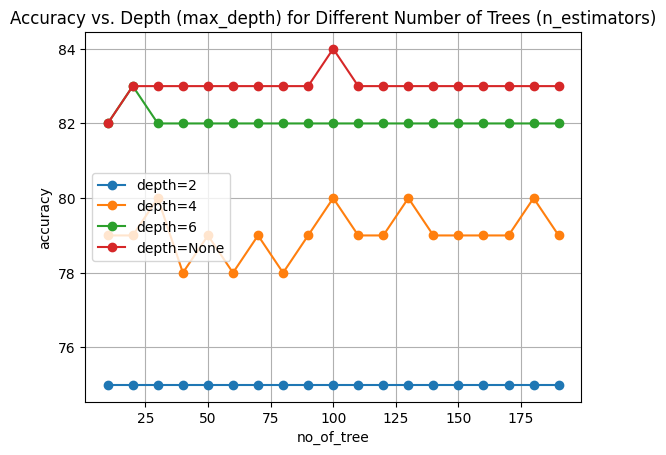

In [93]:


fig, ax = plt.subplots()

for i,j in accuracy_dict.items():
    no_of_trees = [l[0] for l in j]
    accuracy = [int(float(f'{l[1]*100:.2f}')) for l in j]
    print(accuracy)
  
    print(no_of_trees)
    plt.plot(no_of_trees,accuracy, marker='o', label=f'depth={i}')
    print('\n')
    

plt.xlabel('no_of_tree')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs. Depth (max_depth) for Different Number of Trees (n_estimators)')
plt.grid(True)
plt.savefig('desired_variance_95.png')

## Seprate plots

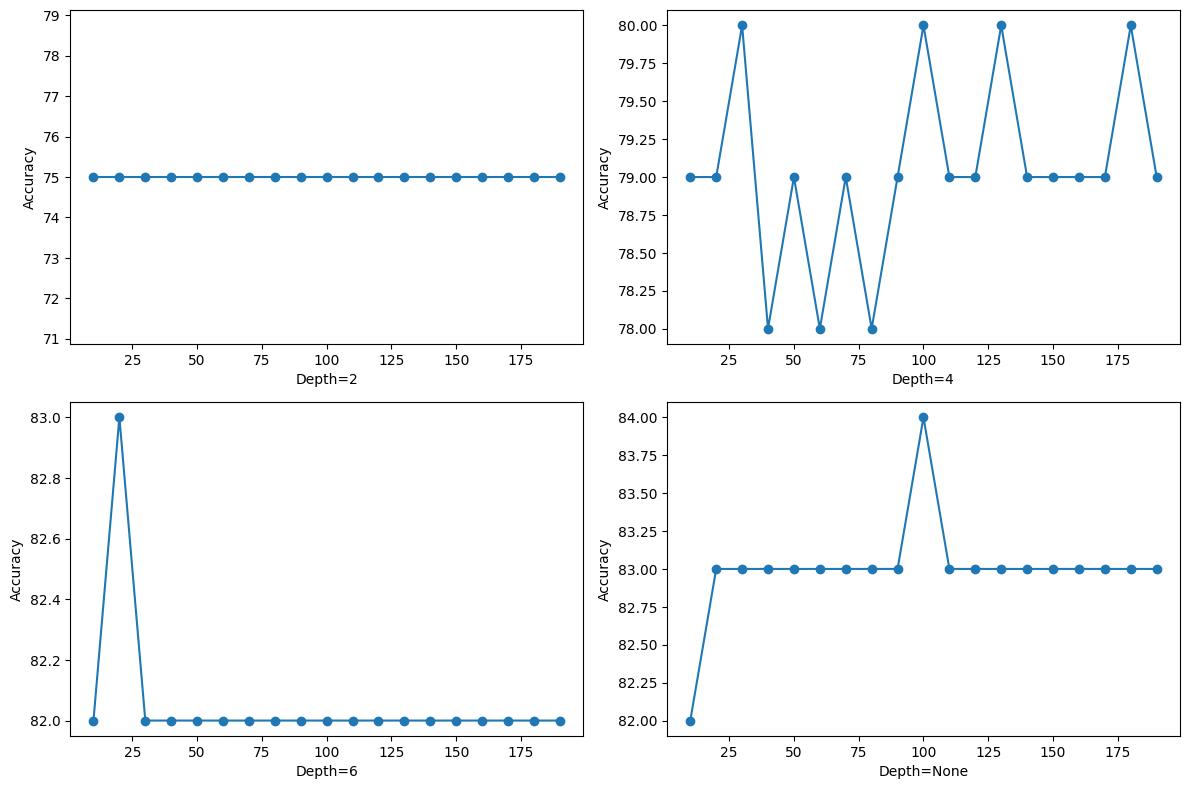

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for index, (i, j) in enumerate(accuracy_dict.items()):
    no_of_trees = [l[0] for l in j]
    accuracy = [int(float(f'{l[1]*100:.2f}')) for l in j]
  
    # Create a separate plot in each subplot
    axs[index].plot(no_of_trees, accuracy, marker='o')
    axs[index].set_xlabel(f'Depth={i}')
    axs[index].set_ylabel('Accuracy')

# Adjust the layout for better spacing
plt.tight_layout()
plt.savefig('desired_variance_95.png')
# Display the subplots
plt.show()